## Wrangling and Analyzing

### Wrangling
***importing libraries***

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import json
import re
import tweepy
from tweepy import OAuthHandler

### Gathering Data

reading downloaded twitter data from "twitter-archive-enhanced"

In [92]:
df = pd.read_csv('twitter-archive-enhanced.csv')

Getting data from Twitter API and saving it in a text file

In [16]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Eu6VXoYB7CVMasc4PnnXEeGPV'
consumer_secret = 'kQnqoSerh77MLq1MIvmwWJszl0Qr8vNekVPQrktOhIiULuszn8'
access_token = '2382175314-qIVYkZsulVgFpHAvwMAU4iCWWmdJuRNClqGsdfh'
access_secret = 'oy5Kbgx69eV9IbzDpInLnvZG2Fq3Qr2r85GNdzgGFju4A'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)


In [17]:
tweet_id = df['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [19]:
tweet = api.get_status(tweet_id[0])
tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [20]:

# Iterate over tweet_ids to obtain favorites and retweet count. Then append these has dicts into df_list.
df_list = []

# Any tweet_ids not found by API, are appended to e_list
e_list = []

for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        e_list.append(id)


892420643555336193 37768 8229
892177421306343426 32442 6079
891815181378084864 24432 4023
891689557279858688 41099 8381
891327558926688256 39303 9084
891087950875897856 19766 3012
890971913173991426 11553 1991
890729181411237888 63704 18285
890609185150312448 27153 4137
890240255349198849 31142 7150
890006608113172480 29932 7108
889880896479866881 27146 4822
889665388333682689 46921 9730
889638837579907072 26470 4389
889531135344209921 14753 2182
889278841981685760 24630 5206
888917238123831296 28421 4367
888804989199671297 24945 4149
888554962724278272 19346 3428
888078434458587136 21230 3384
887705289381826560 29470 5220
887517139158093824 45149 11344
887473957103951883 67297 17614
887343217045368832 32854 10110
887101392804085760 29835 5782
886983233522544640 34282 7530
886736880519319552 11760 3170
886680336477933568 21900 4326
886366144734445568 20673 3104
886267009285017600 116 4
886258384151887873 27312 6108
886054160059072513 0 104
885984800019947520 31827 6560
8855289432054702

838476387338051585 23489 5096
838201503651401729 0 10695
838150277551247360 1748 352
838085839343206401 147 0
838083903487373313 18333 3350
837820167694528512 35583 8334
837482249356513284 3995 467
837471256429613056 13302 2423
837366284874571778 22032 5633
837110210464448512 16686 2538
836989968035819520 13245 2442
836753516572119041 20053 4899
836677758902222849 13142 2364
836648853927522308 0 579
836397794269200385 0 29422
836380477523124226 15371 3155
836260088725786625 22154 4555
836001077879255040 19912 4561
835685285446955009 0 8672
835574547218894849 18573 3854
835536468978302976 0 1815
835309094223372289 0 22365
835297930240217089 17135 3195
835264098648616962 8062 1815
835246439529840640 2184 77
835172783151792128 27260 6110
835152434251116546 23432 3211
834931633769889797 11292 1757
834786237630337024 22117 5858
834574053763584002 14269 2692
834477809192075265 0 11381
834458053273591808 10036 1786
834209720923721728 21514 5098
834167344700198914 16457 3881
834089966724603904

800859414831898624 734 104
800855607700029440 0 1775
800751577355128832 11175 3019
800513324630806528 13978 3281
800459316964663297 10064 2347
800443802682937345 0 4688
800388270626521089 11855 3056
800188575492947969 0 4298
800141422401830912 16295 2789
800018252395122689 30194 14331
799774291445383169 0 5088
799757965289017345 8938 2353
799422933579902976 8555 2082
799308762079035393 0 6003
799297110730567681 10535 3012
799063482566066176 8588 2681
798933969379225600 13977 4868
798925684722855936 7916 1554
798705661114773508 0 7177
798701998996647937 0 8482
798697898615730177 0 7074
798694562394996736 0 5396
798686750113755136 0 2522
798682547630837760 0 5134
798673117451325440 0 6031
798665375516884993 0 4241
798644042770751489 0 2016
798628517273620480 0 2141
798585098161549313 0 6213
798576900688019456 0 6368
798340744599797760 0 3652
798209839306514432 11032 2777
797971864723324932 12386 3420
797545162159308800 15446 5279
797236660651966464 21264 7226
797165961484890113 246 29
79

762464539388485633 10841 4496
762316489655476224 5058 1207
762035686371364864 33619 16744
761976711479193600 5677 2161
761750502866649088 0 4220
761745352076779520 4467 920
761672994376806400 52110 31129
761599872357261312 4339 1260
761371037149827077 0 19265
761334018830917632 5463 1552
761292947749015552 4690 1176
761227390836215808 5584 1669
761004547850530816 11900 3723
760893934457552897 4017 1040
760656994973933572 6950 2064
760641137271070720 5210 1383
760539183865880579 7959 3892
760521673607086080 4440 1495
760290219849637889 28195 12300
760252756032651264 4141 927
760190180481531904 5983 1937
760153949710192640 0 33
759943073749200896 6232 2238
759923798737051648 15410 6056
759846353224826880 7054 2125
759793422261743616 6260 2035
759566828574212096 0 22627
759557299618865152 4922 1255
759447681597108224 8915 2611
759446261539934208 1757 521
759197388317847553 6355 2085
759159934323924993 0 1242
759099523532779520 15256 4466
759047813560868866 6829 2168
758854675097526272 372

726224900189511680 4567 1206
725842289046749185 7300 2789
725786712245440512 4311 1431
725729321944506368 5374 1878
725458796924002305 1459 654
724983749226668032 3844 1370
724771698126512129 2457 675
724405726123311104 5483 1729
724049859469295616 4471 1861
724046343203856385 2750 591
724004602748780546 4334 1652
723912936180330496 4034 1292
723688335806480385 7964 3131
723673163800948736 3132 939
723179728551723008 5472 1973
722974582966214656 4247 1648
722613351520608256 5137 1722
721503162398597120 4817 1973
721001180231503872 2618 646
720785406564900865 3225 805
720775346191278080 2569 712
720415127506415616 4286 1579
720389942216527872 6621 2643
720340705894408192 2968 1029
720059472081784833 4026 1180
720043174954147842 5083 2109
719991154352222208 5000 1833
719704490224398336 4708 1522
719551379208073216 5232 2029
719367763014393856 2889 780
719339463458033665 4562 1314
719332531645071360 3537 1003
718971898235854848 3611 1151
718939241951195136 5418 1852
718631497683582976 195

697242256848379904 2614 703
696900204696625153 3313 1078
696894894812565505 2430 709
696886256886657024 5039 1900
696877980375769088 2534 746
696754882863349760 1539 377
696744641916489729 2150 989
696713835009417216 2465 679
696518437233913856 4051 1793
696490539101908992 1270 152
696488710901260288 2644 1085
696405997980676096 3344 1204
696100768806522880 2017 701
695816827381944320 3129 1231
695794761660297217 3311 821
695767669421768709 1947 790
695629776980148225 4747 2219
695446424020918272 4550 1911
695409464418041856 8997 3769
695314793360662529 3781 1548
695095422348574720 2744 649
695074328191332352 2960 1170
695064344191721472 1672 635
695051054296211456 2768 832
694925794720792577 2805 963
694905863685980160 2860 982
694669722378485760 37187 15262
694356675654983680 1568 302
694352839993344000 2128 656
694342028726001664 1637 509
694329668942569472 2088 526
694206574471057408 4353 2142
694183373896572928 3068 982
694001791655137281 3534 1087
693993230313091072 1946 427
6939

680070545539371008 2680 929
679877062409191424 2051 684
679872969355714560 2262 700
679862121895714818 2550 656
679854723806179328 2970 1304
679844490799091713 2459 806
679828447187857408 37616 14866
679777920601223168 3200 1178
679736210798047232 2169 839
679729593985699840 2247 868
679722016581222400 1720 496
679530280114372609 4946 2198
679527802031484928 2747 763
679511351870550016 3502 1343
679503373272485890 3255 1557
679475951516934144 2166 673
679462823135686656 32900 19911
679405845277462528 2463 1270
679158373988876288 22218 8563
679148763231985668 2871 1090
679132435750195208 3076 1225
679111216690831360 6172 2702
679062614270468097 17661 8677
679047485189439488 2329 715
679001094530465792 2926 1305
678991772295516161 2408 1244
678969228704284672 1699 487
678800283649069056 2666 953
678798276842360832 3597 1253
678774928607469569 2896 968
678767140346941444 3664 1441
678764513869611008 1694 503
678755239630127104 7395 3491
678740035362037760 3890 1792
678708137298427904 5764

672160042234327040 881 365
672139350159835138 1761 726
672125275208069120 2427 1162
672095186491711488 1009 374
672082170312290304 946 374
672068090318987265 1297 525
671896809300709376 8536 4241
671891728106971137 1344 585
671882082306625538 3497 1403
671879137494245376 1433 694
671874878652489728 1254 569
671866342182637568 1127 508
671855973984772097 911 454
671789708968640512 7118 3553
671768281401958400 1200 536
671763349865160704 1698 946
671744970634719232 1360 786
671743150407421952 746 236
671735591348891648 1463 771
671729906628341761 8560 4429
671561002136281088 12905 7361
671550332464455680 923 211
671547767500775424 1363 606
671544874165002241 1994 1067
671542985629241344 1100 574
671538301157904385 934 403
671536543010570240 1186 418
671533943490011136 1031 590
671528761649688577 849 265
671520732782923777 1412 535
671518598289059840 960 296
671511350426865664 1617 738
671504605491109889 7072 3608
671497587707535361 925 453
671488513339211776 1018 479
671486386088865792 5

666454714377183233 511 208
666447344410484738 102 20
666437273139982337 122 47
666435652385423360 163 53
666430724426358785 311 194
666428276349472768 163 82
666421158376562688 311 111
666418789513326592 122 45
666411507551481857 433 321
666407126856765440 105 40
666396247373291520 162 83
666373753744588802 182 88
666362758909284353 756 559
666353288456101888 215 71
666345417576210432 284 132
666337882303524864 191 89
666293911632134144 489 343
666287406224695296 142 63
666273097616637952 170 76
666268910803644416 100 35
666104133288665088 14011 6368
666102155909144576 77 11
666099513787052032 150 66
666094000022159362 160 72
666082916733198337 113 44
666073100786774016 315 159
666071193221509120 142 58
666063827256086533 464 213
666058600524156928 109 57
666057090499244032 290 138
666055525042405380 428 235
666051853826850816 1195 829
666050758794694657 130 57
666049248165822465 105 42
666044226329800704 290 136
666033412701032449 122 43
666029285002620928 125 46
666020888022790149 25

In [21]:
# Analysis of first 5 tweets to ensure iteration has worked correctly
df_list[:5]

[{'tweet_id': 892420643555336193, 'favorites': 37768, 'retweet_count': 8229},
 {'tweet_id': 892177421306343426, 'favorites': 32442, 'retweet_count': 6079},
 {'tweet_id': 891815181378084864, 'favorites': 24432, 'retweet_count': 4023},
 {'tweet_id': 891689557279858688, 'favorites': 41099, 'retweet_count': 8381},
 {'tweet_id': 891327558926688256, 'favorites': 39303, 'retweet_count': 9084}]

In [22]:
# View list of exceptions
e_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [23]:
# Try re-iteration for tweet_ids in exception list as suggested by other students to see if there was an error the 
# first time.   
ee_list = []

for e in e_list:
    try:
        page = api.get_status(e, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweets)
                        })
        
    except Exception:
        ee_list.append(e)


In [24]:
# View list of exceptions again. The presumption is these tweets are no longer available to get with the API.
ee_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

Assigning twitter data to df2

In [65]:
df2 = pd.DataFrame(df_list, columns=['tweet_id','favorites','retweet_count'])

In [66]:
df2.to_csv('json_tweet.txt', encoding = 'utf-8', index=False)

Creating df3 contining data from image-predictions-3.tsv

In [4]:
df3 = pd.read_csv('image-predictions-3.tsv', delimiter = '\t')

Now we have data from three different sources having three different data types

Getting information about the data frames

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id         2339 non-null int64
favorites        2339 non-null int64
retweet_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Buddy         7
Bailey        7
an            7
Toby          7
Daisy         7
Rusty         6
Oscar         6
Bella         6
Scout         6
Stanley       6
Jax           6
Leo           6
Milo          6
Dave          6
Jack          6
Koda          6
Gus           5
           ... 
Zuzu          1
Petrick       1
Tito          1
Opie          1
Alf           1
Emma          1
Filup         1
Pilot         1
Skittle       1
Berkeley      1
Barclay       1
Hermione      1
Torque        1
Bobby         1
Lucky         1
Lenox         1
Sundance      1
Chuck         1
Snoopy        1
Storkson      1
Dwight        1
JD            1
Ridley        1
Dante         1
Jonah         1
Binky         1
Staniel       1
Tobi          1
Swagger       1
Napolean      1
Name: name, Length: 957,

In [14]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [123]:
df['puppo'].value_counts()

None     1948
puppo      23
Name: puppo, dtype: int64

In [10]:
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### finding out the number of duplicates in df, df2, df3

In [37]:
sum(df.duplicated())

0

In [38]:
sum(df2.duplicated())

0

In [39]:
sum(df3.duplicated())

0

##### Filling the null values in df, df2 and df3 with ' ' 

In [40]:
df.fillna('0', inplace = True)

In [41]:
df2.fillna('0', inplace = True)

In [42]:
df3.fillna('0', inplace = True)

##### creating clean dataframes

In [95]:
twitter_clean_df = df.copy() 

In [96]:
api_clean_df = pd.DataFrame(df2, columns = ['tweet_id','favorites','retweet_count'])

In [97]:
image_clean_df = df3.copy() 

# Assessing the Data

#### Visually with Excel and Pandas
In the Gathering step, we opened all the three datasets to get a feel of them using dh.head() and df.info() 

#### Programmatically
To get some furthur insights we use df['column_name'].value_counts.


### Quality and Tidiness Issues to clean

#### Quality Issues ie. ( consistency, completeness, accuracy and validity issues)
 1. The dataframes have different number of total rows ( df has 2536 rows, df2 has 1453 rows and df3 has 2075 rows) probabbly       due to missing data .
 2. "df" contains 181 retweets and 81 replies that have no use.
 3. there are many names of dogs that are incorrect like 'a', 'an' etc.
 4. strange values in rating_numerator and rating denominator
 5. not all data is in the data type it should be
 6. consistent names and logical order to columns 
 7. source data column is not clear
 8. timestamp column is not required
 
#### Tidiness issues ie structural issues
 1. there are 4 columns doggo, floofer, pupper and puppo that should actually be one.
 2. there are 3 predictions in image-predictions data but the best one should suffice
 3. there are 3 dataframes (df, df2, df3) only one should be there

## Cleaning

In [98]:
# creating copies of the three datasets
twitter_df = twitter_clean_df.copy()
api_df = api_clean_df.copy()
image_df = image_clean_df.copy()

In [99]:
# Save a copy of the clean datasets to work with
twitter_clean_df.to_csv('archive_clean.csv',encoding='utf-8',index=False)
image_clean_df.to_csv('image_clean.csv',encoding='utf-8',index=False)
api_clean_df.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [100]:
# Load clean datasets
archive_clean_df = pd.read_csv('archive_clean.csv')
image_clean_df = pd.read_csv('image_clean.csv')
json_clean_df = pd.read_csv('json_clean.csv')

#### 1. Merging the dataframes into one

In [101]:
# Joining the three DataFrames into one master DataFrame
data_master_df = pd.merge(archive_clean_df, json_clean_df, on=['tweet_id'],how='left')

In [102]:
data_master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37768.0,8229.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32442.0,6079.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,24432.0,4023.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,41099.0,8381.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,39303.0,9084.0


In [103]:
# Merge data_master with image_clean
data_master_df = pd.merge(data_master_df, image_clean_df, on='tweet_id',how='left')

In [104]:
pd.set_option("display.max_columns",30)
data_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37768.0,8229.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32442.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [105]:
data_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     23

In [111]:
# Save a copy of the newly created master dataframe 
data_master_df.to_csv('data_master.csv',encoding='utf-8',index=False)

#### 2. Removing Retweets and Replies

In [112]:
df = pd.read_csv('data_master.csv')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     23

In [115]:
# there are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
# "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
df = df[df.retweeted_status_id.isnull()]

In [116]:
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
favorites                2172 non-null float64
retweet_count            2172 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf              

In [118]:
# current state of dataframe
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37768.0,8229.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32442.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [119]:
df = df[df.in_reply_to_status_id.isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
favorites                2094 non-null float64
retweet_count            2094 non-null float64
jpg_url                  1971 non-null object
img_num                  1971 non-null float64
p1                       1971 non-null object
p1_conf                

In [120]:
# delete the column having no data from the master dataframe.
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorites             2094 non-null float64
retweet_count         2094 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### 3. Remove tweets that do not have an image

In [122]:
df = df[df.jpg_url.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorites             1968 non-null float64
retweet_count         1968 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### 4. change the 4 dog type into one dog_type

In [124]:
# Join the 4 columns into a column to be deleted and a value'dog_type'column to keep.
df1 = pd.melt(df, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
tweet_id              7884 non-null int64
timestamp             7884 non-null object
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
favorites             7872 non-null float64
retweet_count         7872 non-null float64
jpg_url               7884 non-null object
img_num               7884 non-null float64
p1                    7884 non-null object
p1_conf               7884 non-null float64
p1_dog                7884 non-null object
p2                    7884 non-null object
p2_conf               7884 non-null float64
p2_dog                7884 non-null object
p3                    7884 non-null object
p3_conf               7884 non-null float64
p3_dog                7884 non

In [126]:
df1.dog_type.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [128]:
df1.drop('types', axis=1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,37768.0,8229.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,32442.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,24432.0,4023.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,41099.0,8381.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,39303.0,9084.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,19766.0,3012.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,11553.0,1991.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,63704.0,18285.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,27153.0,4137.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,31142.0,7150.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


#### 5. Reducing the three columns used to predict breed of the dog into one

In [129]:
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df1.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df1['breed'] = breed
df1['confidence'] = confidence

# check that the columns have been added
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,37768.0,8229.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,32442.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,24432.0,4023.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,41099.0,8381.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,39303.0,9084.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,basset,0.555712


In [130]:
# Dropping the predictions and prediction probability columns
df1 = df1.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 15 columns):
tweet_id              7884 non-null int64
timestamp             7884 non-null object
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
favorites             7872 non-null float64
retweet_count         7872 non-null float64
jpg_url               7884 non-null object
types                 7884 non-null object
dog_type              7884 non-null object
breed                 7884 non-null object
confidence            7884 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 924.0+ KB


#### 6. Changing the dog names into suitable ones

In [131]:
# Checking the list of dog names.
list(df1['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',

In [132]:
names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df1.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
df1['names'] = names
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,types,dog_type,breed,confidence,names
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,37768.0,8229.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,doggo,None,Unknown,0.000000,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,32442.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,doggo,None,Chihuahua,0.323581,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,24432.0,4023.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,doggo,None,Chihuahua,0.716012,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,41099.0,8381.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,doggo,None,Labrador_retriever,0.168086,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,39303.0,9084.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,doggo,None,basset,0.555712,Franklin


In [133]:
df1['names'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [134]:
df1['name'] = df1['names']
df1 = df1.drop('names', axis=1)
df1['name'].value_counts()

None         2488
Charlie        44
Cooper         40
Oliver         40
Lucy           40
Tucker         36
Penny          36
Winston        32
Sadie          32
Lola           28
Daisy          28
Toby           28
Bella          24
Koda           24
Stanley        24
Bo             24
Jax            24
Louis          20
Scout          20
Oscar          20
Bailey         20
Dave           20
Rusty          20
Chester        20
Leo            20
Buddy          20
Milo           20
Winnie         16
Phil           16
Clarence       16
             ... 
Lorelei         4
Chase           4
Stubert         4
Rumpole         4
Baron           4
Kingsley        4
Harrison        4
Grizzwald       4
Sobe            4
Einstein        4
Eugene          4
Shadoe          4
Hanz            4
Bubba           4
Jarvis          4
Sora            4
Grizzie         4
Florence        4
Carly           4
Tuck            4
Vinscent        4
Mary            4
Maddie          4
Alf             4
Lili      

#### 7. Investigating values in rating denominator and rating numerator

In [135]:
df1.rating_denominator.value_counts()

10     7816
50       12
11        8
80        8
7         4
170       4
150       4
110       4
90        4
70        4
2         4
120       4
40        4
20        4
Name: rating_denominator, dtype: int64

In [142]:
df1.rating_numerator.value_counts()

12      1784
10      1676
11      1572
13      1016
9        600
8        380
7        204
14       136
5        132
6        128
3         76
4         60
2         36
1         16
60         4
44         4
80         4
144        4
84         4
88         4
99         4
204        4
420        4
1776       4
75         4
45         4
121        4
165        4
26         4
27         4
0          4
Name: rating_numerator, dtype: int64

In [136]:
df1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweet_count', 'jpg_url', 'types', 'dog_type', 'breed', 'confidence'],
      dtype='object')

In [137]:
rating_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)
rating_df = rating_df[rating_df.rating_denominator != 10]

In [143]:
rating2_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [139]:
pd.set_option("display.max_colwidth",280)
rating_df

,tweet_id,text,rating_numerator,rating_denominator,types
320,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,doggo
382,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\r\nKeep Sam smiling by clicking and sharing this link:\r\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,doggo
658,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,doggo
794,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,doggo
842,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,doggo
884,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,doggo
918,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,doggo
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,doggo
963,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,doggo
981,709198395643068416,"From left to right:\r\r\nCletus, Jerome, Alejandro, Burp, &amp; Titson\r\r\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,doggo


In [144]:
# This time our expectation would be a value between 0 and 14.
# Filter the dataframe to include values outside of the above parameter.
rating2_df = rating2_df[rating2_df.rating_numerator > 14]

rating2_df

,tweet_id,text,rating_numerator,rating_denominator,types
320,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,doggo
499,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,doggo
549,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,doggo
658,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,doggo
722,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,doggo
842,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,doggo
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,doggo
963,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,doggo
981,709198395643068416,"From left to right:\r\r\nCletus, Jerome, Alejandro, Burp, &amp; Titson\r\r\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,doggo
1045,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,doggo


In [140]:
# Reading the text of Tweet_id 666287406224695296 - the correct value should be 9/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df1.loc[df1.tweet_id == 666287406224695296, 'rating_denominator'] = 10

# Reading the text of Tweet_id 682962037429899265 - the correct value should be 10/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 682962037429899265, 'rating_denominator'] = 10

# Reading the text of Tweet_id 716439118184652801 - the correct value should be 11/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df1.loc[df1.tweet_id == 716439118184652801, 'rating_denominator'] = 10

# Reading the text of Tweet_id 810984652412424192 - there is no correct value in the text so allocated 10/10
# so has to be neutral
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 810984652412424192, 'rating_denominator'] = 10


# Reading the text of Tweet_id 740373189193256964 - the correct value should be 14/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df1.loc[df1.tweet_id == 740373189193256964, 'rating_denominator'] = 10

# Reading the text of Tweet_id 722974582966214656 - the correct value should be 13/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df1.loc[df1.tweet_id == 722974582966214656, 'rating_denominator'] = 10


##### Most of the tweets relate to groups of dogs already discussed .
##### Reading through the others, there are some users giving decimal point evaluations. I will round these to the nearest whole number.

In [147]:
df1.loc[df1.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # 11.26 rounded to 11 
df1.loc[df1.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # 9.75 rounded to 10
df1.loc[df1.tweet_id == 778027034220126208, 'rating_numerator'] = 11  # 11.27 rounded to 11

# There are 2 tweets with ridiculous ratings of 420/10 and 1776/10, but I'll leave these because it is the rating given
# by the tweeter and the site is a "tongue-in-cheek" site. 
#I just remember to eliminate these outliers in any analyses or visualizations.

##### The other strange denominator ratings are due to the tweet being based on groups of dogs and the tweeter
##### has given a rating for each member of the group. I'll leave these ratings as it reflects the text and photo.

In [141]:
df1.rating_denominator.value_counts()

10     7840
50        8
80        8
170       4
150       4
110       4
90        4
70        4
120       4
40        4
Name: rating_denominator, dtype: int64

In [146]:
df1.rating_numerator.value_counts()

12      1784
10      1680
11      1580
13      1016
9        600
8        380
7        204
14       136
5        132
6        128
3         76
4         60
2         36
1         16
88         4
44         4
60         4
80         4
84         4
99         4
144        4
204        4
420        4
1776       4
45         4
121        4
165        4
0          4
Name: rating_numerator, dtype: int64

#### 8. shorten data in source column using regex library

In [148]:
# Use re library with findall function and extract real source from tags > ...... <
df1['source'] = df1['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [149]:
df1.source.value_counts()

Twitter for iPhone    7728
Twitter Web Client     112
TweetDeck               44
Name: source, dtype: int64

#### 9. Remove non needed numbers from timestamp and change its data type to appropriate one

In [151]:
# Removing +0000 from timestamp column
df1.timestamp = df1.timestamp.str.strip('+0000')


# Changing data type to datetime
df1.timestamp = pd.to_datetime(df1.timestamp)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

### I accidentally ran the code again that is why the error is showing

In [152]:
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 15 columns):
tweet_id              7884 non-null int64
timestamp             7884 non-null datetime64[ns]
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
favorites             7872 non-null float64
retweet_count         7872 non-null float64
jpg_url               7884 non-null object
types                 7884 non-null object
dog_type              7884 non-null object
breed                 7884 non-null object
confidence            7884 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 924.0+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,types,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,37768.0,8229.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,doggo,None,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,32442.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,doggo,None,Chihuahua,0.323581


#### 10. Changing column data types to appropriate ones

In [155]:

# changing data types to most suitable data type and rounding confidence to 2 decimal places to make easier to read
df1['tweet_id'] = df1['tweet_id'].astype(object)
df1['source'] = df1['source'].astype('category')
df1['favorites'] = df1['favorites'].astype(float)
df1['retweet_count'] = df1['retweet_count'].astype(float)
df1['dog_type'] = df1['dog_type'].astype('category')
df1['confidence'] = df1['confidence'].round(2)

In [156]:
# checking that the change has been done
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 15 columns):
tweet_id              7884 non-null object
timestamp             7884 non-null datetime64[ns]
source                7884 non-null category
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
favorites             7872 non-null float64
retweet_count         7872 non-null float64
jpg_url               7884 non-null object
types                 7884 non-null object
dog_type              7884 non-null category
breed                 7884 non-null object
confidence            7884 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 816.5+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,types,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,37768.0,8229.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,doggo,None,Unknown,0.00
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,32442.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,doggo,None,Chihuahua,0.32


In [157]:
# Renaming the columns to make it easier to understand for someone not familiar with the original data sets
df1 = df1.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'favorites':'no_of_likes',
                           'jpg_url': 'image_link',
                           'breed': 'dog_breed',
                           'confidence': 'probability_AI_calc'})

In [158]:
# Reorder the columns 
df1 = df1[['tweet_id','tweet_date','tweet_source','tweet_text','dog_name',
           'dog_score','out_of','dog_type','dog_breed','probability_AI_calc',
          'no_of_likes','retweet_count','tweet_url','image_link']]

In [159]:
df1.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13,10,None,Unknown,0.00,37768.0,8229.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13,10,None,Chihuahua,0.32,32442.0,6079.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12,10,None,Chihuahua,0.72,24432.0,4023.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13,10,None,Labrador_retriever,0.17,41099.0,8381.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12,10,None,basset,0.56,39303.0,9084.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [160]:
df1.to_csv('data_master.csv', encoding='utf-8',index=False)

In [162]:
df_clean = pd.read_csv('data_master.csv')
df_clean.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13,10,None,Unknown,0.00,37768.0,8229.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13,10,None,Chihuahua,0.32,32442.0,6079.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12,10,None,Chihuahua,0.72,24432.0,4023.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13,10,None,Labrador_retriever,0.17,41099.0,8381.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12,10,None,basset,0.56,39303.0,9084.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


### Analyzing the data

In [163]:
# all visualization libraries have been imported earlier

% matplotlib inline
# Set style of plots with seaborn
sns.set(style="darkgrid",font_scale=1.5)

In [164]:
df_clean.describe()

,tweet_id,dog_score,out_of,probability_AI_calc,no_of_likes,retweet_count
count,7.884000e+03,7884.000000,7884.000000,7884.000000,7872.000000,7872.000000
mean,7.360418e+17,12.160325,10.456621,0.466301,8709.097561,2642.284553
std,6.751525e+16,41.588790,6.787361,0.339632,12762.430488,4708.152264
min,6.660209e+17,0.000000,10.000000,0.000000,77.000000,11.000000
25%,6.758531e+17,10.000000,10.000000,0.140000,1874.000000,589.000000
50%,7.088343e+17,11.000000,10.000000,0.460000,3935.000000,1271.000000
75%,7.881506e+17,12.000000,10.000000,0.780000,10863.250000,3013.750000
max,8.924206e+17,1776.000000,170.000000,1.000000,163067.000000,82919.000000



#### As a potential future dog owner, I'd want to know, "Which breed of dog will I like?"

##### From the WeRateDogs Twitter account we can obtain quickly some initial information to start our decision process.

##### We can answer the following questions: 
##### Which breeds are most tweeted about? 
##### Which breeds obtain the highest ratings? Which breeds receive most likes on average?

In [165]:
# Which dog breeds are the most tweeted
df_clean.dog_breed.value_counts().nlargest(10)

Unknown               1220
golden_retriever       624
Labrador_retriever     424
Pembroke               376
Chihuahua              360
pug                    248
toy_poodle             200
chow                   192
Samoyed                168
Pomeranian             164
Name: dog_breed, dtype: int64

In [166]:
# There are 305 tweets where the breed is unidentified 
df_clean.loc[df_clean['dog_breed'] == 'Unknown', 'dog_breed'] = None

In [168]:
# Number of observations used for analysis and visualizations
df_clean.dog_breed.count()

6664

In [169]:
df_clean.dog_breed.value_counts().nlargest(10)

golden_retriever      624
Labrador_retriever    424
Pembroke              376
Chihuahua             360
pug                   248
toy_poodle            200
chow                  192
Samoyed               168
Pomeranian            164
malamute              132
Name: dog_breed, dtype: int64

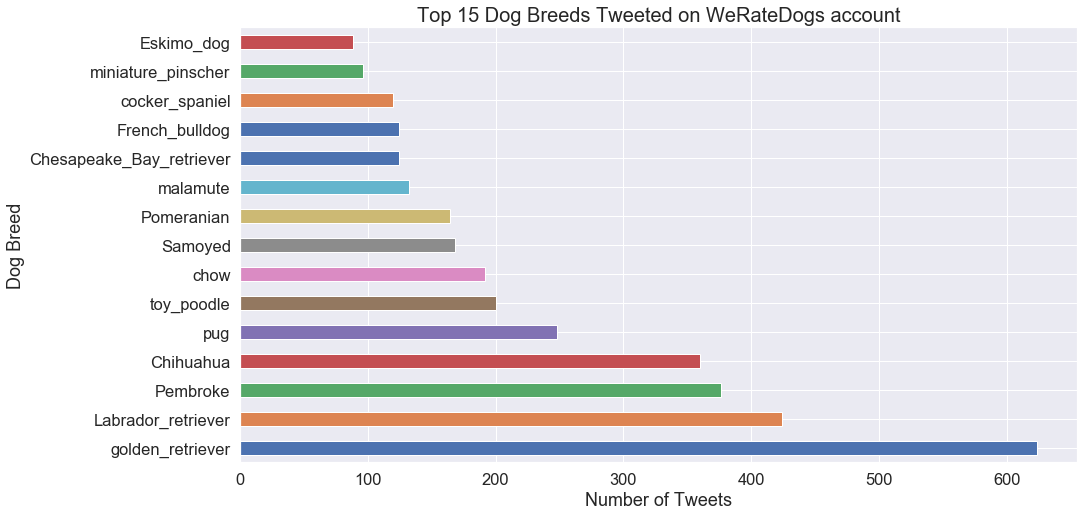

In [170]:
# Plotting a horizontal bar chart to show the top 15 dog breeds
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_breed').count()['dog_score'].sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Top 15 Dog Breeds Tweeted on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets");

From the graph we can see the top five tweeted dogs in order are Golden Retriever, Labrador Retriever, Pembroke Welsh Corgi, Chihuahua and Pug.
With the Golden Retriever receiving substantially more tweets at 156 than the other breeds

In [171]:
# Looking at the ratings for each of the breeds
# Remember to remove the 2 outliers we identified in the cleaning and the ratings for groups of dogs.
# So we take scores only from 0 to 14.
df_clean1 = df_clean[df_clean['dog_score'] <= 14]

In [172]:
# Let us look at the statistice for all breeds removing outliers and groups.
df_clean1['dog_score'].describe()

count    7832.000000
mean       10.540347
std         2.171819
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: dog_score, dtype: float64

In [173]:
# group these scores by breed and have a look at some statistics.
df_clean1.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan_hound,12.0,9.666667,4.923660,3.0,3.00,13.0,13.00,13.0
Airedale,48.0,9.833333,2.176600,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,64.0,10.312500,2.996691,0.0,10.00,11.0,12.00,13.0
Appenzeller,8.0,11.000000,2.138090,9.0,9.00,11.0,13.00,13.0
Australian_terrier,8.0,11.500000,1.603567,10.0,10.00,11.5,13.00,13.0
Bedlington_terrier,24.0,10.333333,2.929114,6.0,8.00,10.5,13.00,14.0
Bernese_mountain_dog,44.0,11.272727,1.064515,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,40.0,11.100000,1.057331,9.0,10.00,11.5,12.00,12.0
Border_collie,48.0,10.583333,2.421827,4.0,9.75,11.5,12.00,13.0


In [174]:
# the top scores by breed.
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.690476
Name: dog_score, dtype: float64

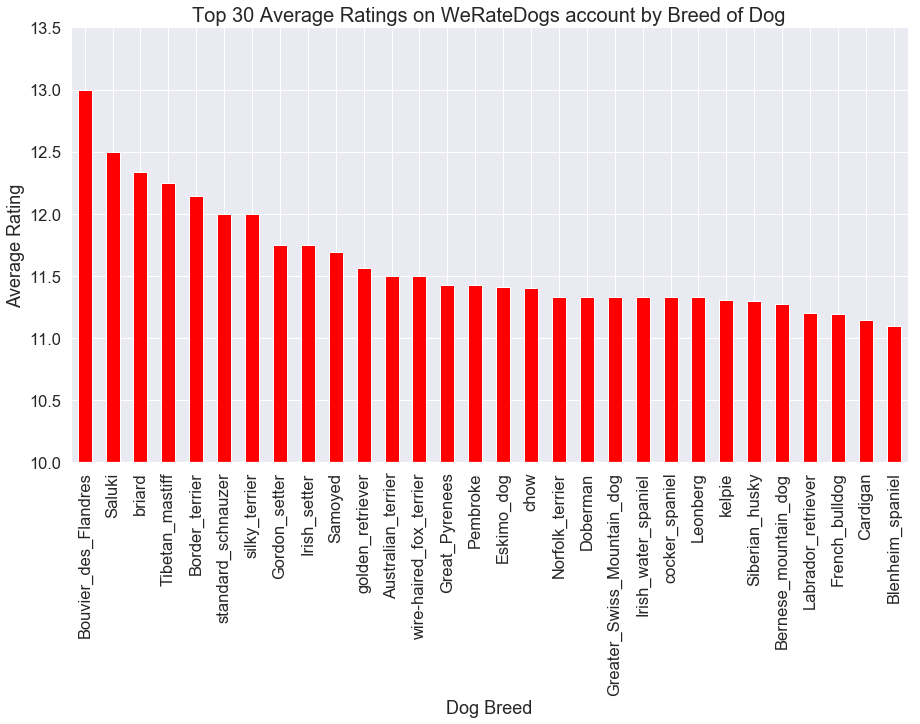

In [175]:
# plottig the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='red')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,13.5);

>So the top breeds by rating are Bouvier des Flandres, Saluki, Briard, Tibetan Mastiff and Border Terrier. These breeds are not as well-known as the breeds in our top tweeted dogs.
I see that there is only one rating for Bouvier des Flandres.this plot might be misleading. So we redo the chart but include only breeds with at least 10 ratings

In [176]:
# Creating a variable that includes dog breeds with more than 9 counts
count = df_clean['dog_breed'].value_counts()

In [177]:
# Creating a new dataframe that includes only dog breeds with at least 10 ratings
df_clean2 = df_clean[df_clean['dog_breed'].isin(count[count > 9].index)]

In [178]:
# Checking the dataframe
df_clean2

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13,10,None,Chihuahua,0.32,32442.0,6079.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12,10,None,Chihuahua,0.72,24432.0,4023.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13,10,None,Labrador_retriever,0.17,41099.0,8381.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12,10,None,basset,0.56,39303.0,9084.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,13,10,None,Chesapeake_Bay_retriever,0.43,19766.0,3012.0,https://twitter.com/dog_rates/status/891087950875897856/photo/1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,13,10,None,Pomeranian,0.57,63704.0,18285.0,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,13,10,None,Irish_terrier,0.49,27153.0,4137.0,https://twitter.com/dog_rates/status/890609185150312448/photo/1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,14,10,doggo,Pembroke,0.51,31142.0,7150.0,https://twitter.com/dog_rates/status/890240255349198849/photo/1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,Koda,13,10,None,Samoyed,0.96,29932.0,7108.0,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
11,889880896479866881,2017-07-25 16:11:53,Twitter for iPhone,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,Bruno,13,10,None,French_bulldog,0.38,27146.0,4822.0,https://twitter.com/dog_rates/status/88988089647986688

In [179]:
# filtering out the outliers and groups of dogs.
df_clean3 = df_clean2[df_clean2['dog_score'] <= 14]

In [180]:
# the statistical summary for these breeds.
df_clean3.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan_hound,12.0,9.666667,4.923660,3.0,3.00,13.0,13.00,13.0
Airedale,48.0,9.833333,2.176600,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,64.0,10.312500,2.996691,0.0,10.00,11.0,12.00,13.0
Bedlington_terrier,24.0,10.333333,2.929114,6.0,8.00,10.5,13.00,14.0
Bernese_mountain_dog,44.0,11.272727,1.064515,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,40.0,11.100000,1.057331,9.0,10.00,11.5,12.00,12.0
Border_collie,48.0,10.583333,2.421827,4.0,9.75,11.5,12.00,13.0
Border_terrier,28.0,12.142857,0.650600,11.0,12.00,12.0,13.00,13.0
Boston_bull,48.0,9.416667,2.040373,5.0,8.75,10.0,11.00,12.0


In [181]:
# we look at the top scores by breed again.
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Saluki              12.500000
briard              12.333333
Tibetan_mastiff     12.250000
Border_terrier      12.142857
Irish_setter        11.750000
Gordon_setter       11.750000
Samoyed             11.690476
golden_retriever    11.561290
Great_Pyrenees      11.428571
Pembroke            11.425532
Name: dog_score, dtype: float64

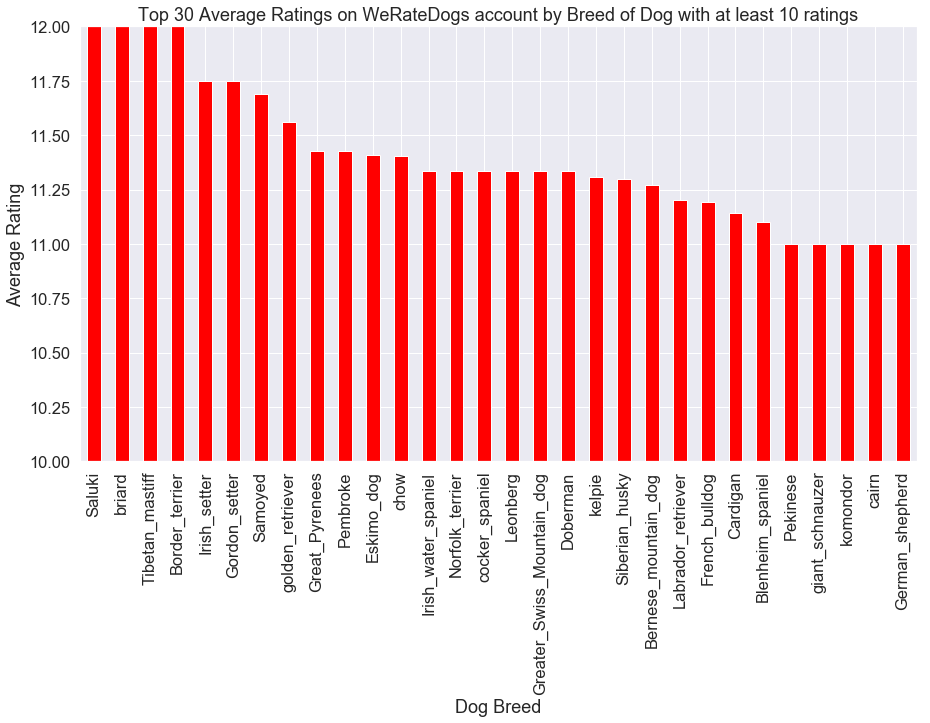

In [182]:
# plotting the top scores for the top 30 breeds on a standard bar chart again
fig = plt.figure(figsize=(15,8))
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='red')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog with at least 10 ratings",fontsize=18)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,12);

Our top rated breeds are Samoyed, Golden Retriever, Great Pyrenees, Pembroke Welsh Corgi and Eskimo Dog.

The Golden Retriver and Pembroke Welsh Corgi appear on both our lists so far.

In [183]:
# Final analysis breeds with most average likes.
# Using the dataset filtered for breeds with more than 10 ratings, and excluding outliers and groups of dogs.
df_clean3.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13,10,None,Chihuahua,0.32,32442.0,6079.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12,10,None,Chihuahua,0.72,24432.0,4023.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13,10,None,Labrador_retriever,0.17,41099.0,8381.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12,10,None,basset,0.56,39303.0,9084.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,13,10,None,Chesapeake_Bay_retriever,0.43,19766.0,3012.0,https://twitter.com/dog_rates/status/891087950875897856/photo/1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg


In [184]:

# Total number of likes
df_clean3['no_of_likes'].sum()

59413044.0

In [185]:

# Total number of likes grouped by breed
df_clean3.groupby('dog_breed')['no_of_likes'].sum()

dog_breed
Afghan_hound                       197272.0
Airedale                           241076.0
American_Staffordshire_terrier     571136.0
Bedlington_terrier                 575596.0
Bernese_mountain_dog               305884.0
Blenheim_spaniel                   353424.0
Border_collie                      409680.0
Border_terrier                     363028.0
Boston_bull                        241860.0
Brabancon_griffon                   10092.0
Brittany_spaniel                   163744.0
Cardigan                          1026784.0
Chesapeake_Bay_retriever          1190516.0
Chihuahua                         2994732.0
Dandie_Dinmont                      92416.0
Doberman                           263364.0
English_setter                     147516.0
English_springer                   540600.0
Eskimo_dog                        1091056.0
French_bulldog                    2340180.0
German_shepherd                    828120.0
German_short-haired_pointer        184056.0
Gordon_setter         

In [186]:

# Number of tweets per dog breed
df_clean3.groupby('dog_breed')['no_of_likes'].count()

dog_breed
Afghan_hound                       12
Airedale                           48
American_Staffordshire_terrier     64
Bedlington_terrier                 24
Bernese_mountain_dog               44
Blenheim_spaniel                   40
Border_collie                      48
Border_terrier                     28
Boston_bull                        48
Brabancon_griffon                  12
Brittany_spaniel                   32
Cardigan                           84
Chesapeake_Bay_retriever          124
Chihuahua                         360
Dandie_Dinmont                     28
Doberman                           36
English_setter                     32
English_springer                   40
Eskimo_dog                         88
French_bulldog                    120
German_shepherd                    84
German_short-haired_pointer        32
Gordon_setter                      16
Great_Dane                         44
Great_Pyrenees                     56
Greater_Swiss_Mountain_dog         12
Ib

In [187]:
# Average number of likes per tweet for each dog breed
df_clean4 = round(df_clean3.groupby('dog_breed')['no_of_likes'].sum() / df_clean3.groupby('dog_breed')['no_of_likes'].count(),0)
df_clean4.sort_values(ascending=False)

dog_breed
Bedlington_terrier             23983.0
Saluki                         23080.0
French_bulldog                 19502.0
Afghan_hound                   16439.0
flat-coated_retriever          16067.0
Irish_water_spaniel            15609.0
Leonberg                       14197.0
whippet                        14023.0
English_springer               13515.0
standard_poodle                13304.0
cocker_spaniel                 13176.0
Samoyed                        13138.0
Mexican_hairless               12974.0
Border_terrier                 12965.0
Great_Pyrenees                 12446.0
Eskimo_dog                     12398.0
Cardigan                       12224.0
Lakeland_terrier               12125.0
golden_retriever               12107.0
Labrador_retriever             11740.0
Tibetan_mastiff                11552.0
Weimaraner                     11430.0
basset                         11237.0
giant_schnauzer                11075.0
Pembroke                       10737.0
Norwegian_elkho

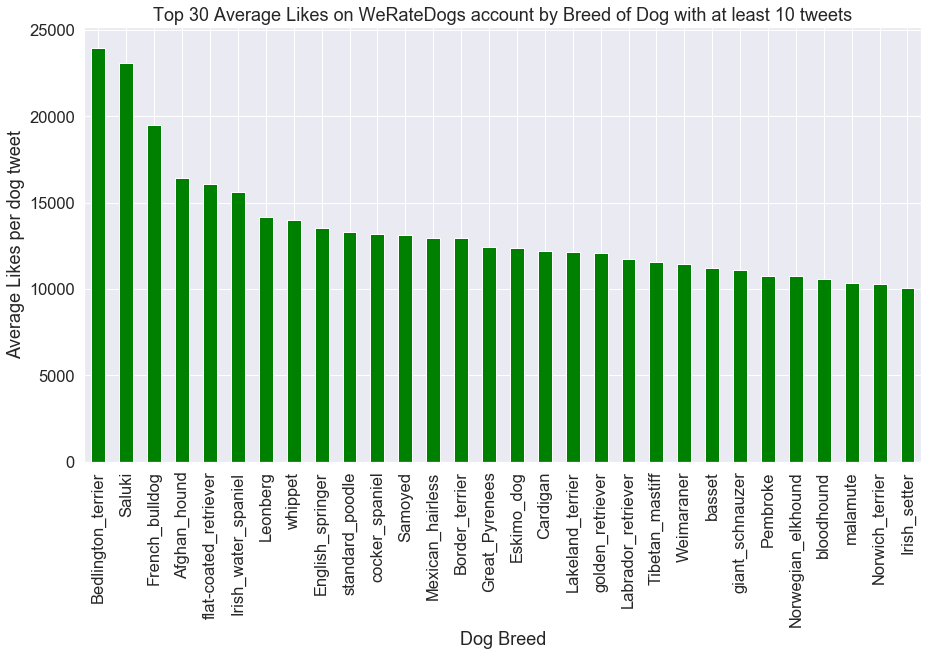

In [188]:
# plot again the average most likes for the top 30 breeds on another bar chart
fig = plt.figure(figsize=(15,8))
df_clean4.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='green')
plt.title("Top 30 Average Likes on WeRateDogs account by Breed of Dog with at least 10 tweets",fontsize=18)
plt.ylabel("Average Likes per dog tweet")
plt.xlabel("Dog Breed");

So the French bulldog is clearly the dog most liked on likes/tweet. Obviously very cute to get so many likes!

Also in the top 10 are Samoyed, Great Pyrenees and Golden Retriever, and at number 11 is the Labrador Retriever and number 14 the Pembroke Welsh Corgi from our other visualizations.

Conclusion: The following breeds of dog seem a good place to start for further investigation into practical aspects costs, pedigree, availability, caring needs and whether my family has empathy for the breed and animal in particular.

Golden Retriever, French Bulldog, Pembroke Welsh Corgi, Samoyed, and Great Pyrenees.

Sources
Udacity Data Wrangling Course - Notes taken.

https://pandas.pydata.org
https://stackoverflow.com/questions
https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
https://nocodewebscraping.com/twitter-json-examples/
http://empierce.com/index.php/2017/11/14/wrangling-weratedogs/
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/